In [1]:
from pathlib import Path
import cantera as ct
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import numpy as np

In [2]:
Air_flow_rate = 5130 # Kg/h
hydraulic_dia = 1.54 # m
Area_air_inlet = (np.pi/4)*hydraulic_dia*hydraulic_dia

fuel_flow_rate = 325 # Kg/h
dia_nozzle = 0.044  # m
Area_fuel_inlet = (np.pi/4)*dia_nozzle*dia_nozzle

air_temp = 1392 # K

fuel_mass_flow = fuel_flow_rate/(3600*Area_fuel_inlet)
air_mass_flow = Air_flow_rate/(3600*Area_air_inlet)

print(fuel_mass_flow)
print(air_mass_flow)

59.372539606136364
0.7650389404822089


In [3]:
P = 101375

comp_o = 'O2:0.21, N2:0.79'  # air composition
comp_f = 'CH4:0.88, C2H6:0.05, N2:0.07'  #fuel composition
width = 0.2  # Distance between fuel and air inlets is 20 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Creating the gas object used to evaluate all thermodynamic, kinetic, and transport properties.
gas = ct.Solution('gri30.yaml')
gas.TP = gas.T, P

# Creating an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Setting the state of the two inlets
f.fuel_inlet.mdot = fuel_mass_flow/2   # assuming radial flow rate to be half of the axial flow rate
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = 303

f.oxidizer_inlet.mdot = air_mass_flow/2   # assuming radial flow rate to be half of the axial flow rate
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = air_temp

# Keeping the boundary emissivities as zero 
# can be tailored depending on the boundary emissivity
f.boundary_emissivities = 0.0, 0.0
# Turning radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solving the problem
f.solve(loglevel, auto=True)
f.show()

# to store the data from the flame
Z_points_1st = []
YO2_values_1st = []
YH2O_values_1st = []
YCO2_values_1st = []
YNO_values_1st = []
YCO_values_1st = []
YC2H6_values_1st = []
YCH4_values_1st = []
XNO_values_1st = []
Z_points_1st.append(f.mixture_fraction('Bilger'))
YO2_values_1st.append(f.Y[gas.species_index('O2')])
YH2O_values_1st.append(f.Y[gas.species_index('H2O')])
YCO2_values_1st.append(f.Y[gas.species_index('CO2')])
YNO_values_1st.append(f.Y[gas.species_index('NO')])
YCO_values_1st.append(f.Y[gas.species_index('CO')])
YC2H6_values_1st.append(f.Y[gas.species_index('C2H6')])
YCH4_values_1st.append(f.Y[gas.species_index('CH4')])
XNO_values_1st.append(f.X[gas.species_index('NO')])



************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 6 point grid with energy equation re-enabled ***********

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

....

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.602e-05      6.032
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002737      4.977
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      8.22e-05       4.57
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.852e-05      4.282
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.668e-05      4.279
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.503e-05      4.273
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.354e-05      4.264
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.22e-05      4.258
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       1.1e-05      4.242
Attempt Newton solution of steady-sta

CanteraError: Could not find a solution for the 1D problem

In [ ]:
flame_temp_1st = f.T
flame_valocity_1st = f.velocity
flame_grid_1st = f.flame.grid
flame_heat_release_1st = f.heat_release_rate/1000000
print("The maximum temperature in LNG (K):", max(flame_temp_1st))
print("The maximum heat release rate in LNG (MW/m^3) :", max(flame_heat_release_1st))

In [33]:
# Specifying the species for which production rates calculation are required
species_of_interest = ['C2H6', 'CH3', 'CO', 'NO', 'CO2', 'H2O', 'H','CH2','O2']  # Replace with your desired species

# Calculate the production rates
production_rates = f.net_production_rates  # All species' production rates
production_rates_species = {species: production_rates[gas.species_index(species)] for species in species_of_interest}

(0.192, 0.2)

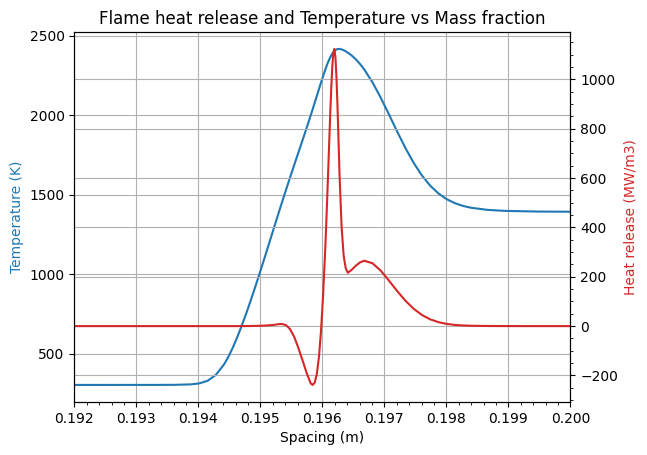

In [34]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Spacing (m)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
ax1.plot(flame_grid_1st, flame_temp_1st, label='Flame Temperature',color='tab:blue')

ax2 = ax1.twinx() 
ax2.set_ylabel('Heat release (MW/m3)', color='tab:red')
ax2.plot(flame_grid_1st, flame_heat_release_1st, label='Flame Velocity',color='tab:red')
plt.minorticks_on()
ax1.grid(True)
ax2.grid(True)
plt.title('Flame heat release and Temperature vs Mass fraction')
plt.xlim([0.192, 0.2])

(0.192, 0.2)

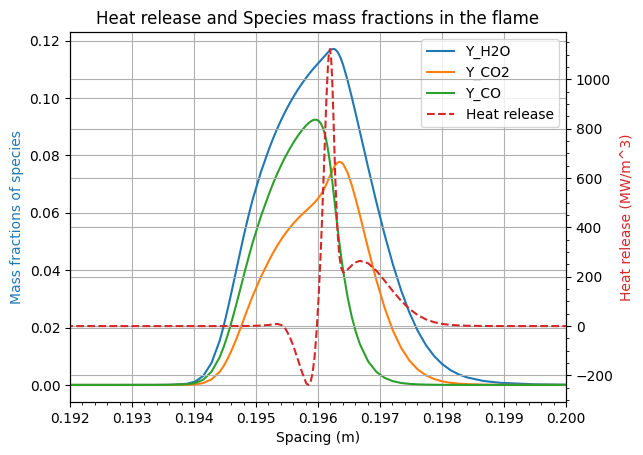

In [38]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Spacing (m)')
ax1.set_ylabel('Mass fractions of species', color='tab:blue')
ax1.plot(flame_grid_1st, YH2O_values_1st[0], label='Y_H2O')
ax1.plot(flame_grid_1st, YCO2_values_1st[0], label='Y_CO2')
ax1.plot(flame_grid_1st, YCO_values_1st[0], label='Y_CO')

ax2 = ax1.twinx() 
ax2.set_ylabel('Heat release (MW/m^3)', color='tab:red')
ax2.plot(flame_grid_1st, flame_heat_release_1st, label='Heat release',color='tab:red', linestyle = '--')
plt.minorticks_on()


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2) 
#ax1.legend(lines + lines2, labels + labels2 , loc='upper right', bbox_to_anchor=(1.55, 1))
ax1.grid(True)
ax2.grid(True)
plt.title('Heat release and Species mass fractions in the flame')
plt.xlim([0.192, 0.2])

(0.192, 0.2)

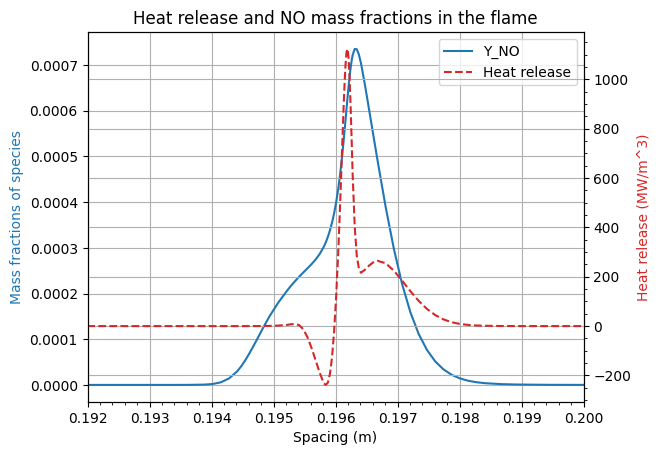

In [39]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Spacing (m)')
ax1.set_ylabel('Mass fractions of species', color='tab:blue')
ax1.plot(flame_grid_1st, YNO_values_1st[0], label='Y_NO')

ax2 = ax1.twinx() 
ax2.set_ylabel('Heat release (MW/m^3)', color='tab:red')
ax2.plot(flame_grid_1st, flame_heat_release_1st, label='Heat release',color='tab:red', linestyle = '--')
plt.minorticks_on()

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2) 
#ax1.legend(lines + lines2, labels + labels2 , loc='upper right', bbox_to_anchor=(1.55, 1))
ax1.grid(True)
ax2.grid(True)
plt.title('Heat release and NO mass fractions in the flame')
plt.xlim([0.192, 0.2])

(0.195, 0.198)

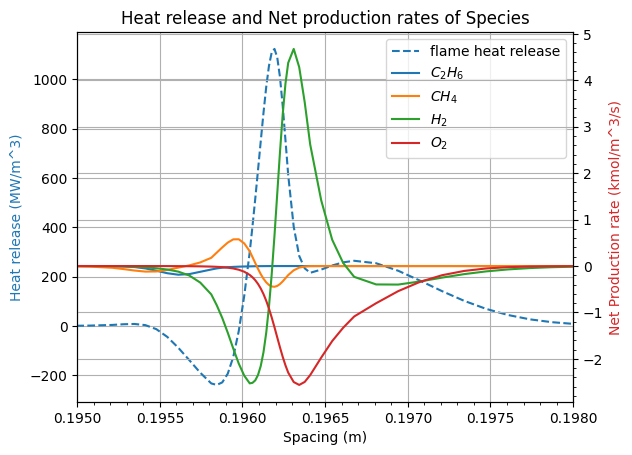

In [45]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Spacing (m)')
ax1.set_ylabel('Heat release (MW/m^3)', color='tab:blue')
ax1.plot(flame_grid_1st, flame_heat_release_1st, label='flame heat release',color='tab:blue',linestyle = '--')

ax2 = ax1.twinx() 
ax2.set_ylabel('Net Production rate (kmol/m^3/s)', color='tab:red')
ax2.plot(flame_grid_1st, production_rates_species['C2H6'], label="$C_{2}H_{6}$")
ax2.plot(flame_grid_1st, production_rates_species['CH3'], label="$CH_{4}$")
ax2.plot(flame_grid_1st, production_rates_species['H'], label="$H_{2}$")
ax2.plot(flame_grid_1st, production_rates_species['O2'], label="$O_{2}$")
plt.minorticks_on()
ax1.grid(True)
ax2.grid(True)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2) 
plt.title('Heat release and Net production rates of Species')
plt.xlim([0.195, 0.198])

In [44]:
print(production_rates_species['C2H6'])

[ 3.33953686e-09  1.61998977e-14 -3.24956953e-15 -3.06448561e-15
 -2.89428311e-15 -2.73796860e-15 -2.59429666e-15 -2.46214316e-15
 -2.34049591e-15 -2.22844194e-15 -2.12515631e-15 -2.02989229e-15
 -1.94197281e-15 -1.86078292e-15 -1.78576308e-15 -1.71640334e-15
 -1.65223812e-15 -1.59284153e-15 -1.53782330e-15 -1.48682507e-15
 -1.43951703e-15 -1.39559496e-15 -1.35477747e-15 -1.31680350e-15
 -1.28143002e-15 -1.24842980e-15 -1.21758938e-15 -1.18870701e-15
 -1.16159058e-15 -1.13605556e-15 -1.11192265e-15 -1.08901525e-15
 -1.06715636e-15 -1.04616479e-15 -1.02585027e-15 -1.00600654e-15
 -9.86401758e-16 -9.66763605e-16 -9.46755948e-16 -9.25938947e-16
 -9.03696363e-16 -8.79091791e-16 -8.50537947e-16 -8.14944275e-16
 -7.94207614e-16 -7.71528375e-16 -9.10182742e-16 -4.04015573e-15
 -6.43838267e-14 -9.58736717e-13 -7.84446788e-13  2.16446691e-10
  1.00352346e-08  7.85900822e-08  5.72357712e-07  3.12927405e-06
  1.23673473e-05  2.46036260e-05  4.63068271e-05  8.30894337e-05
  1.42716438e-04  2.35118